In [52]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import numpy as np

## Ensemble methods 
Ensemble methods are techniques that combine predictions from multiple models to improve overall performance. Instead of relying on a single model, ensembles aggregate the predictions of several models (weak learners) to reduce errors, improve accuracy, and handle bias-variance trade-offs effectively.

In [53]:
# iris = load_iris()
# X, y = iris.data, iris.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# accuracy = rf.score(X_test, y_test)
# print(f"Random Forest Accuracy: {accuracy:.2f}")


In [54]:
df = sns.load_dataset('iris')
# df = pd.DataFrame(iris.data, columns=iris.feature_names)

# df = df.iloc[:, 1:]
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [55]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
new_df = df[df['species'] != 0][['sepal_length', 'sepal_width', 'species']]

In [57]:
new_df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


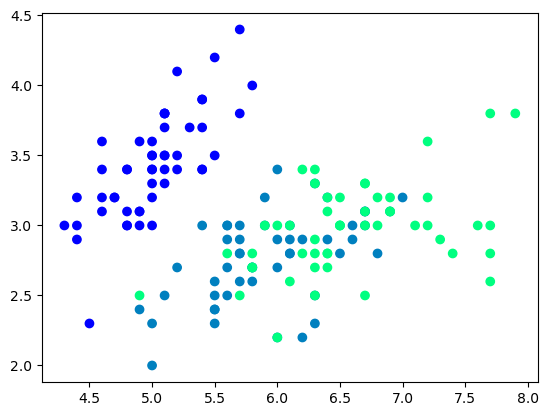

In [58]:
plt.scatter(df['sepal_length'], df['sepal_width'], c= df['species'], cmap = 'winter')

In [59]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [60]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,1
47,4.6,3.2,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
107,7.3,2.9,6.3,1.8,2
41,4.5,2.3,1.3,0.3,0
134,6.1,2.6,5.6,1.4,2
31,5.4,3.4,1.5,0.4,0
28,5.2,3.4,1.4,0.2,0
95,5.7,3.0,4.2,1.2,1
21,5.1,3.7,1.5,0.4,0


In [61]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:,-1].values

## Bagging

Bagging is an ensemble technique in machine learning that improves the accuracy and stability of models by reducing variance. It involves training multiple models (typically the same type) on different subsets of the training data and combining their predictions. The subsets are generated using bootstrap sampling, where data is sampled with replacement.

In [62]:
df_bag = df_train.sample(8, replace = True)
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

In [63]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_pred, y_test)

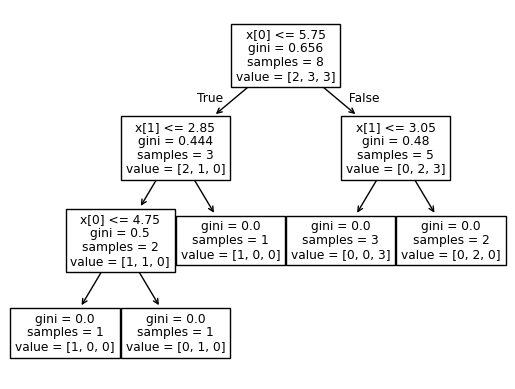

/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6

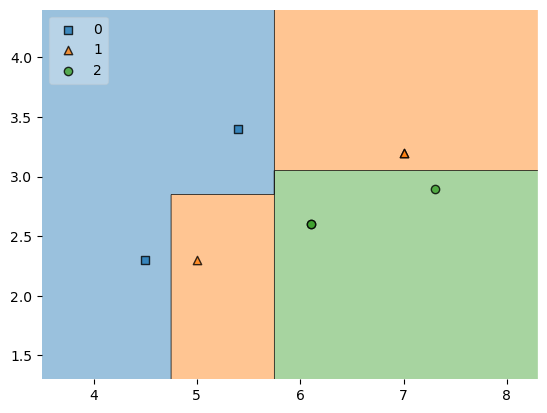

In [64]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X,y)

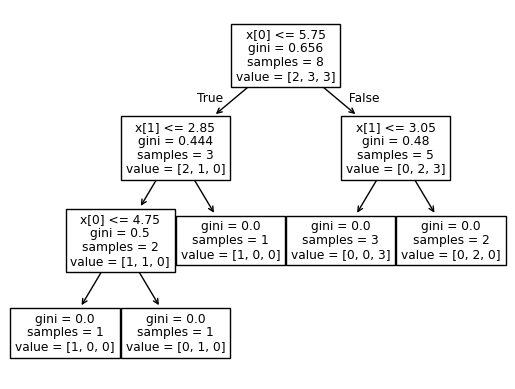

/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6

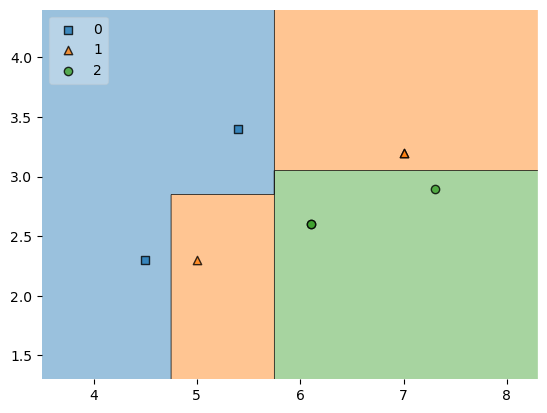

In [65]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

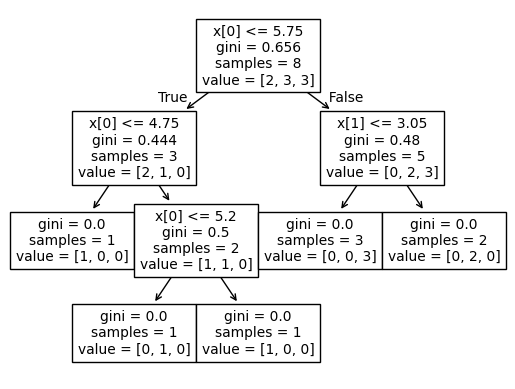

/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4

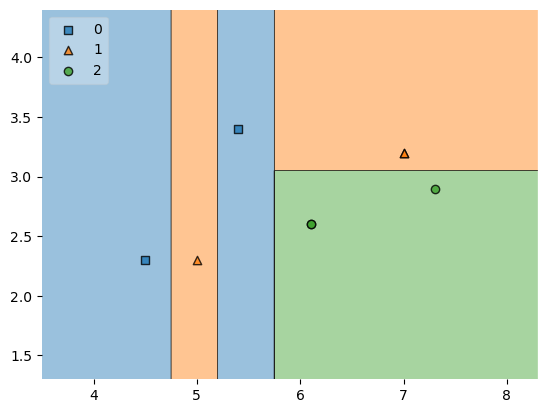

In [66]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

In [67]:
df_test

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,2
34,4.9,3.1,1.5,0.2,0
140,6.7,3.1,5.6,2.4,2
136,6.3,3.4,5.6,2.4,2
42,4.4,3.2,1.3,0.2,0


In [68]:
print("Predictor 1", dt_bag1.predict(np.array([5.1, 2.5]).reshape(1, 2)))
print("Predictor 2", dt_bag2.predict(np.array([5.1, 2.5]).reshape(1, 2)))
print("Predictor 3", dt_bag3.predict(np.array([5.1, 2.5]).reshape(1, 2)))


Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/mobcoder/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Boosting Methods
Boosting is an ensemble technique that builds models sequentially, where each model attempts to correct the errors of the previous one. Unlike bagging, which reduces variance, boosting focuses on reducing bias while keeping variance low. The final predictions are a weighted combination of the predictions from all models.

In [69]:
df = pd.DataFrame()


df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

<Axes: xlabel='X1', ylabel='X2'>

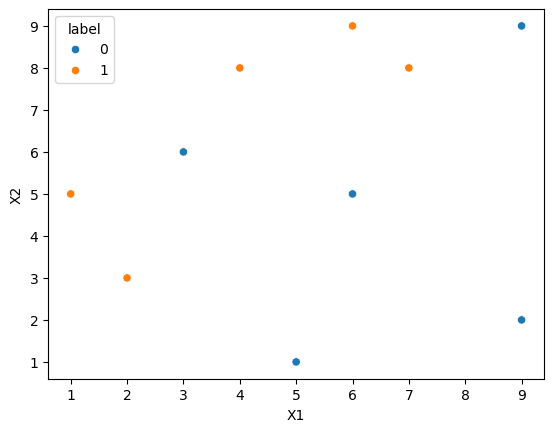

In [70]:
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [71]:
df['weights'] = 1/df.shape[0]     

In [72]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [73]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [74]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [75]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

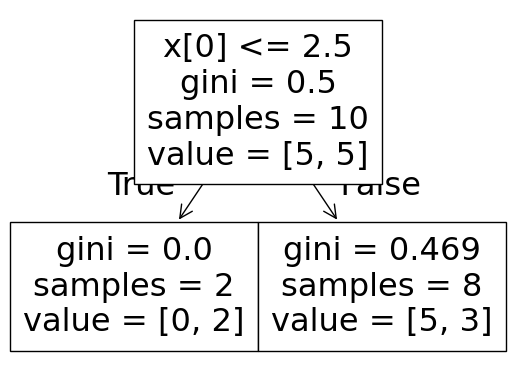

In [76]:
plot_tree(dt1)

<Axes: >

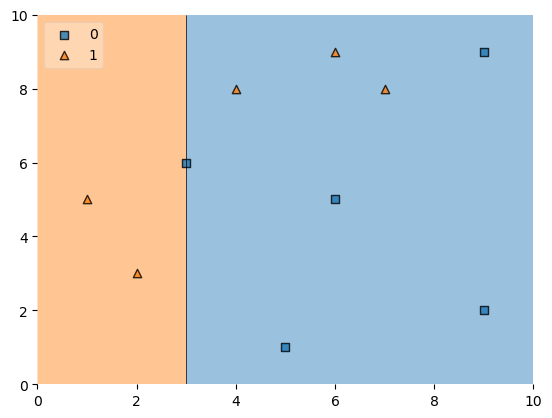

In [77]:
plot_decision_regions(X, y, clf=dt1, legend =2)

In [78]:
df['y_pred'] = dt1.predict(X)

In [79]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [80]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [81]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [82]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [83]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [84]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [85]:
df['updated_weights'].sum()

0.9165153319682015

In [86]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [87]:
df['nomalized_weights'].sum()

1.0

In [88]:

df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [89]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [90]:

df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [91]:

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [92]:
index_values = create_new_dataset(df)

index_values

[1, 5, 5, 6, 7, 0, 5, 5, 5, 9]

In [93]:
second_df = df.iloc[index_values,[0,1,2,3]]

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
9,9,2,0,0.1,0


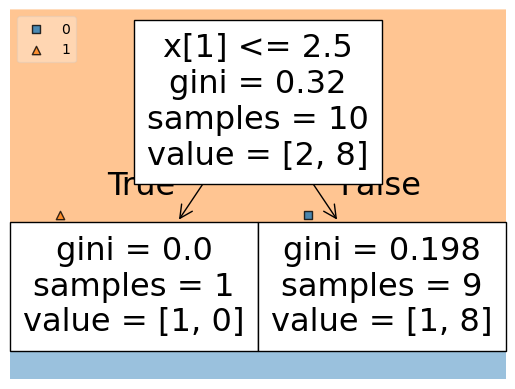

In [94]:
second_df
dt2 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2.fit(X,y)

plot_tree(dt2)

plot_decision_regions(X, y, clf=dt2, legend=2)

second_df['y_pred'] = dt2.predict(X)
second_df

In [95]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [96]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
dt3 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

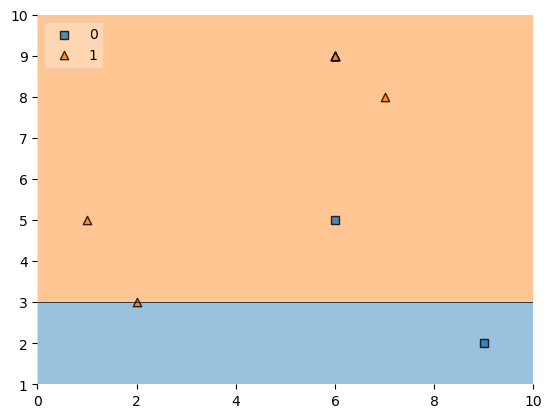

In [97]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [98]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
9,9,2,0,0.1,0


In [99]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [100]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [103]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)
dt2.predict(query)
dt3.predict(query)
alpha1*1 + alpha2*(1) + alpha3*(1)     
1.09861228866811
np.sign(1.09)

1.0

In [104]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)
dt2.predict(query)
dt3.predict(query)
alpha1*(1) + alpha2*(-1) + alpha3*(-1)
     
-0.2513144282809062

np.sign(-0.25)

-1.0